In [1]:
import pandas as pd
import folium
from folium import plugins
from folium.features import DivIcon

In [2]:
volcano_df = pd.read_csv('https://bit.ly/458vXfu')
volcano_df.head(3)

,Volcano Name,Latitude,Longitude
0,Askja,65.03,-16.75
1,Bárðarbunga,64.64,-17.56
2,Brennisteinsfjöll,63.92,-21.83


In [3]:
accommodations = {'Days 1-3': (64.128288, -21.827774),
                  'Day 4':    (65.688492, -18.126169),
                  'Day 5':    (65.6000, -17.0000),
                  'Day 6':    (65.28333, -14.40139),
                  'Day 7':    (64.656888, -14.290051),
                  'Day 8':    (63.7833302, -18.0666664),
                  'Day 9':    (63.5445, -19.8),
                  'Day 10':   (64.258149, -20.514890),
                  'Day 11':   (64.80806, -22.80500)}

In [4]:
waterfalls = {'Kolugjufur':     (65.3335, -20.5645),
              'Hengifoss':      (65.1, -14.9),
              'Svartifoss':     (64.023, -16.975),
              'Skogafoss':      (63.5245, -19.5083),
              'Seljalandsfoss': (63.6095, -19.989),
              'Gullfoss':       (64.3223, -20.1193)}

download a volcano icon from iconfinder: https://www.iconfinder.com/search?q=volcano

In [5]:
# Create basemap and overlay tiles:
center_location = [64.9, -18.6]
map = folium.Map(location=center_location, 
                 tiles='Stamen Terrain', 
                 control_scale=True,
                 zoom_start=7)
folium.raster_layers.TileLayer(tiles='Stamen Toner', opacity=0.3).add_to(map)

In [6]:
# Loop through volcano DataFrame and post volcano names and symbols:
for index, row in volcano_df.iterrows():
    volcano_icon = folium.features.CustomIcon('data/volcano.png', 
                                              icon_size=(20, 20))
    
    folium.Marker(location=(row['Latitude'], row['Longitude']),
                  icon=volcano_icon).add_to(map)
    
    folium.map.Marker((row['Latitude'], row['Longitude']),
                      icon=DivIcon(
                          icon_size=(25, 25),
                          icon_anchor=(-5, 14),
                          html=f'<div style="font-size: 8pt">%s</div>' % str(
                               row['Volcano Name']))).add_to(map)

In [7]:
# Loop through waterfalls dictionary and post waterfall names and symbols:  
for key, value in waterfalls.items():
    waterfall_icon = folium.features.CustomIcon('data/waterfall.png', 
                                                icon_size=(25, 25))
    
    folium.Marker(location=value,
                  fill_opacity=0.5,
                  icon=waterfall_icon).add_to(map)
    
    folium.map.Marker(location=value,
                      icon=DivIcon(
                          icon_size=(23, 23),
                          icon_anchor=(-10, 14),
                          html=f'<div style="color: blue">%s</div>' % str(key))
                     ).add_to(map)

In [8]:
# Loop through accommodations dictionary and post names and symbols:  
for key, value in accommodations.items():          
    folium.CircleMarker(location=value,
                        radius=8,    
                        color='red',
                        fill_color ='red',
                        fill_opacity=0.5).add_to(map)
    
    folium.map.Marker(location=value,
                      icon=DivIcon(
                          icon_size=(45, 30),
                          icon_anchor=(15, 9),
                          html=f'<div style="font-size: 8pt">%s</div>' % str(key)
                      )
                     ).add_to(map)


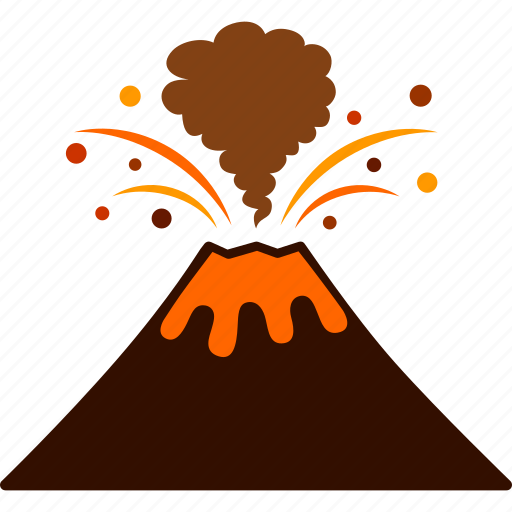
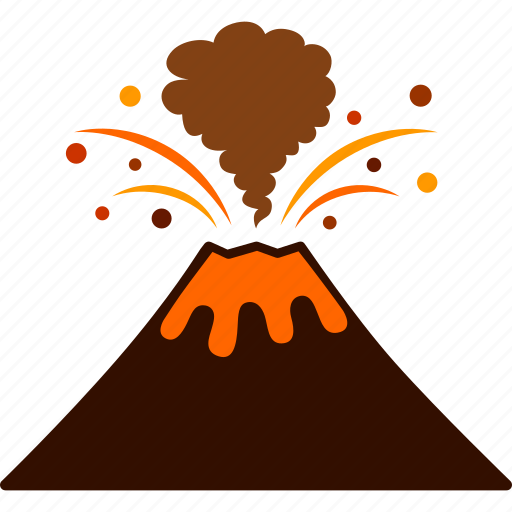
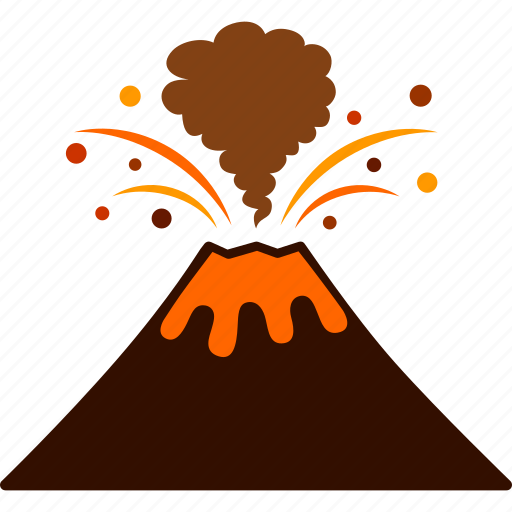
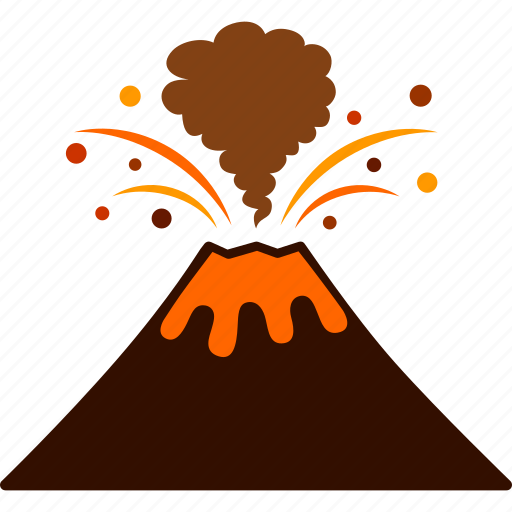
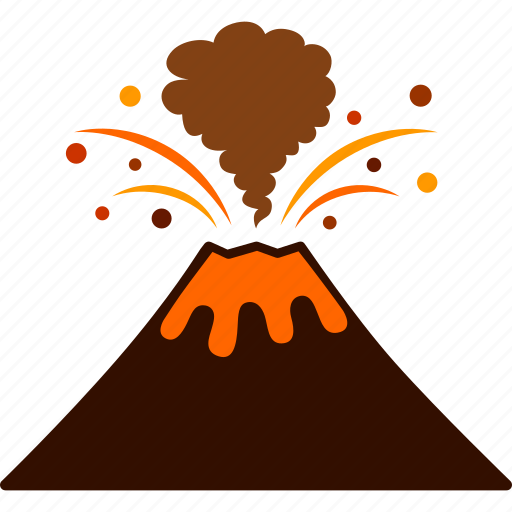
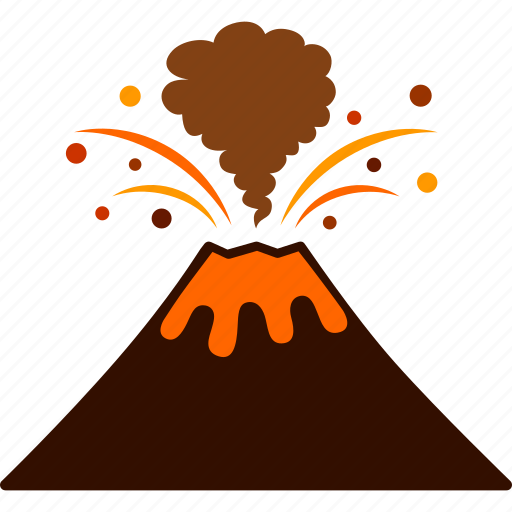
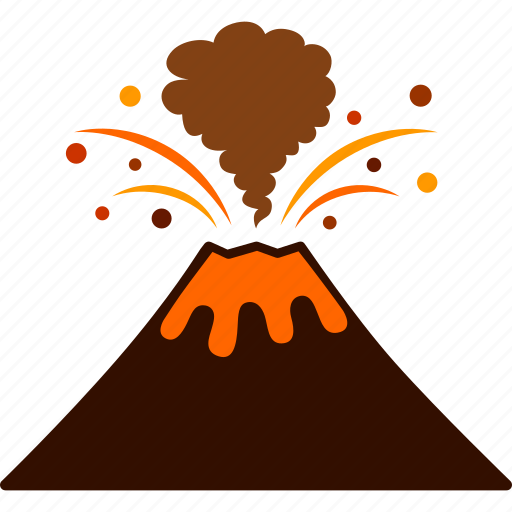
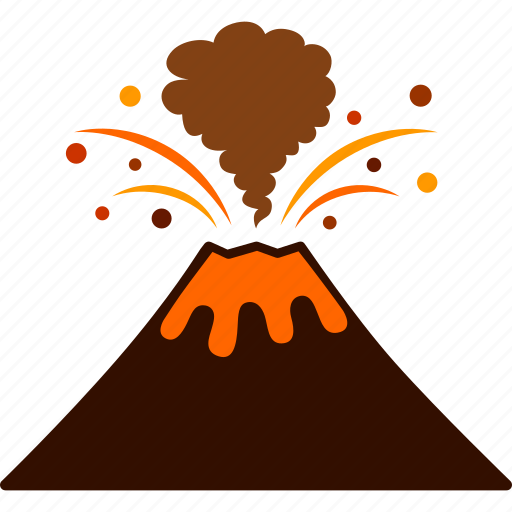
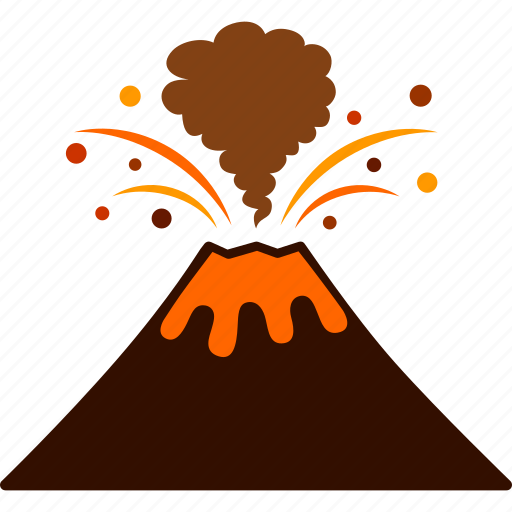
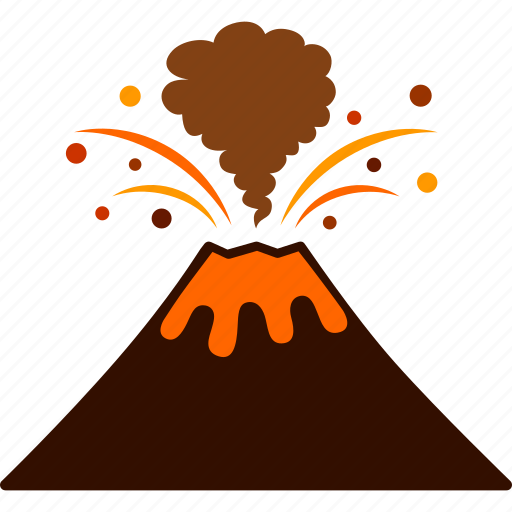
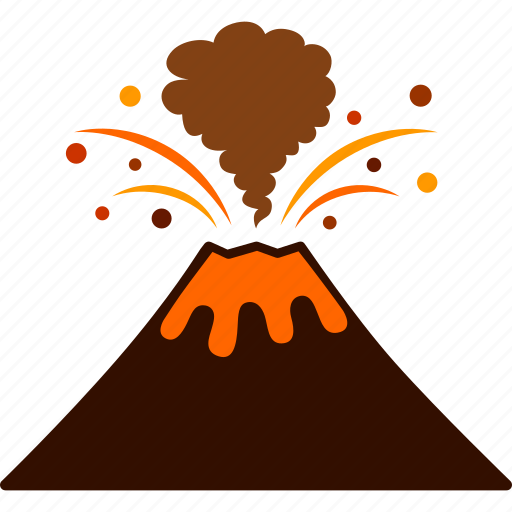
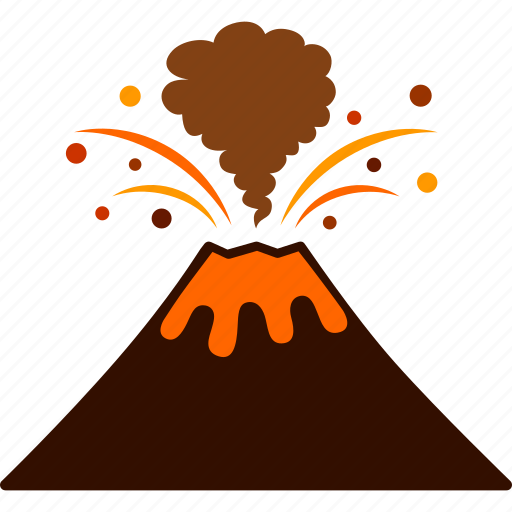
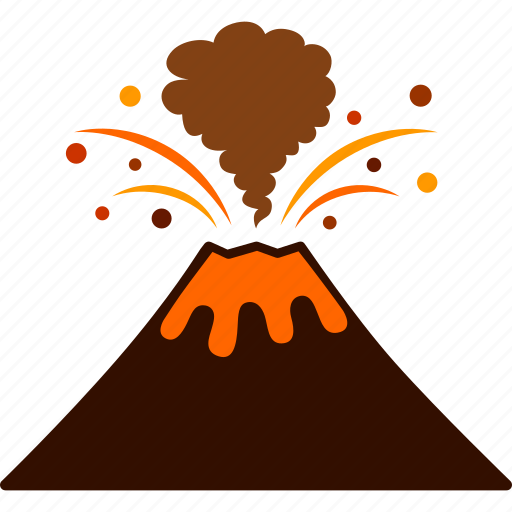
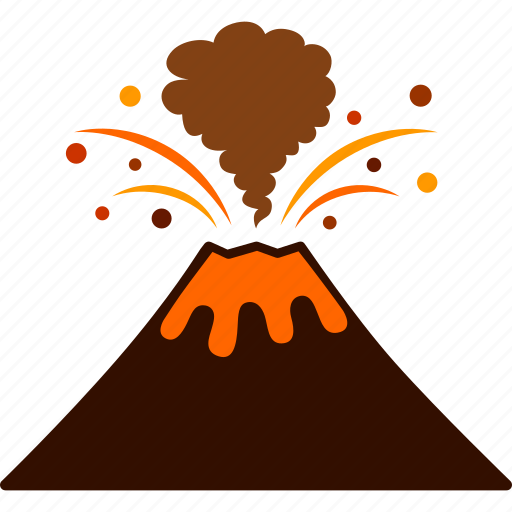
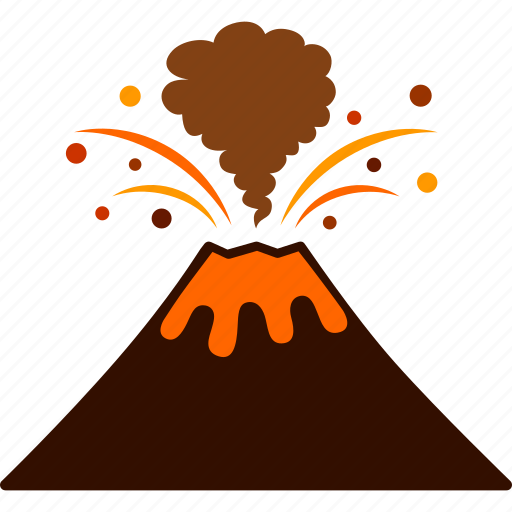
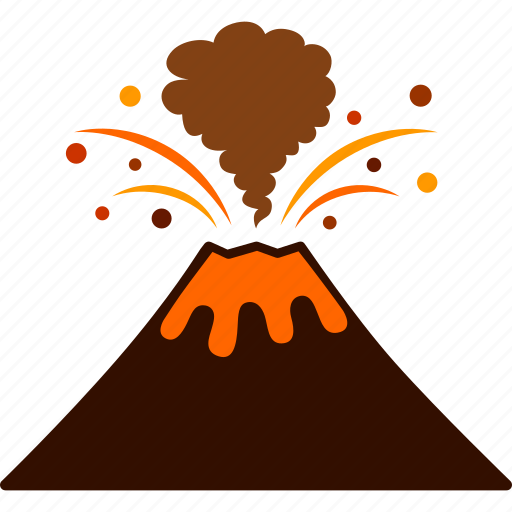
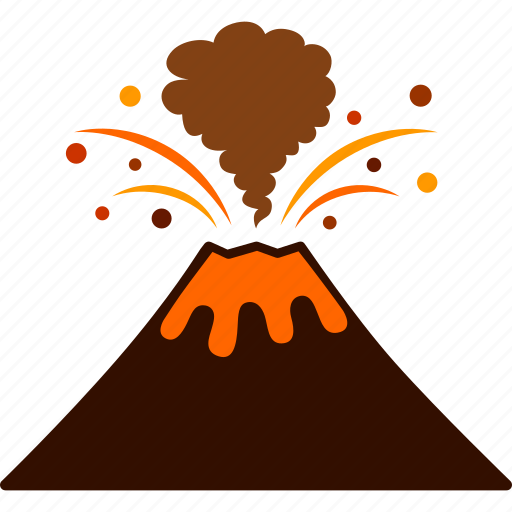
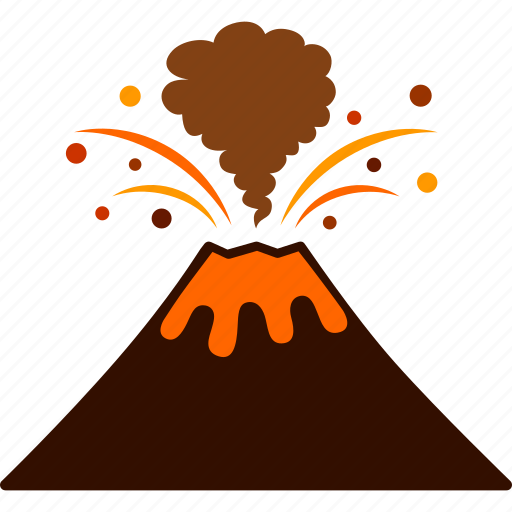
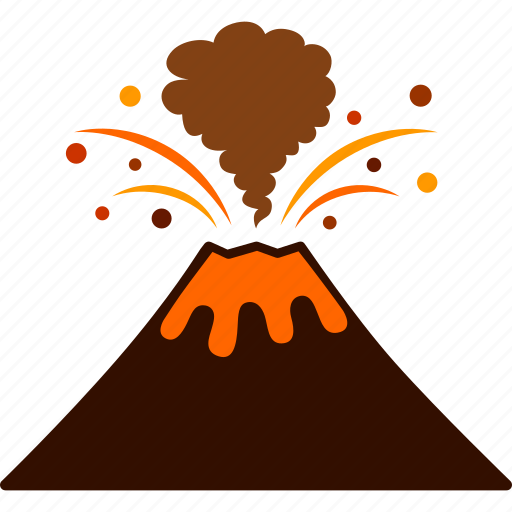
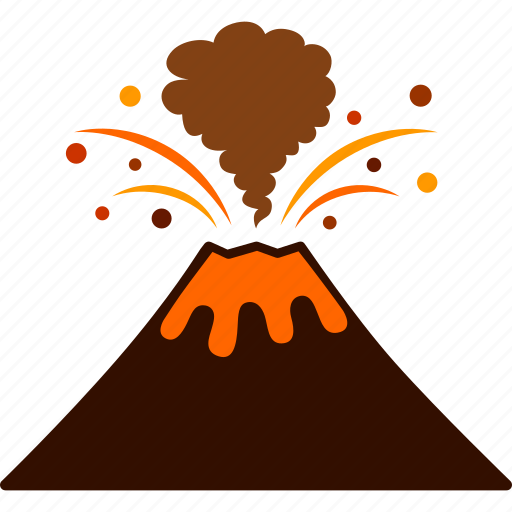
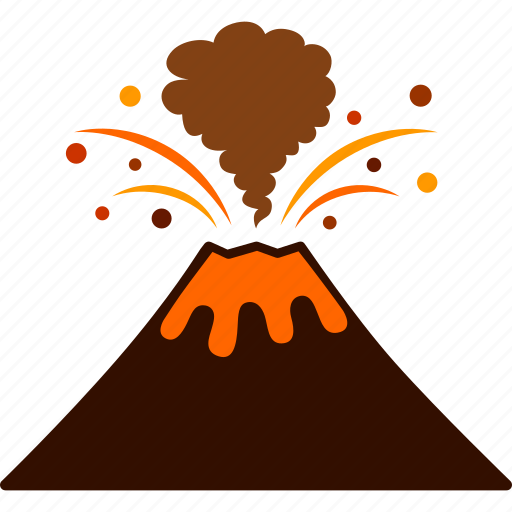
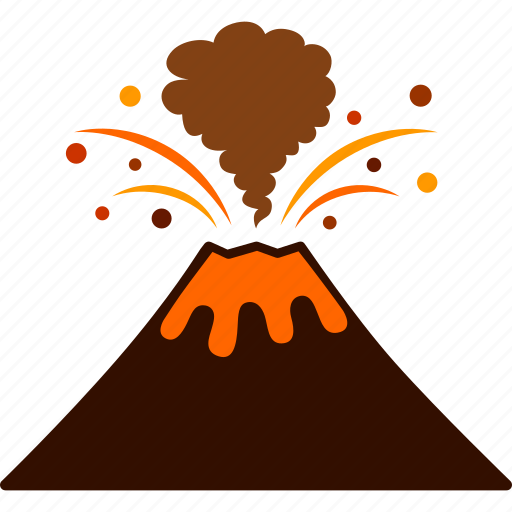
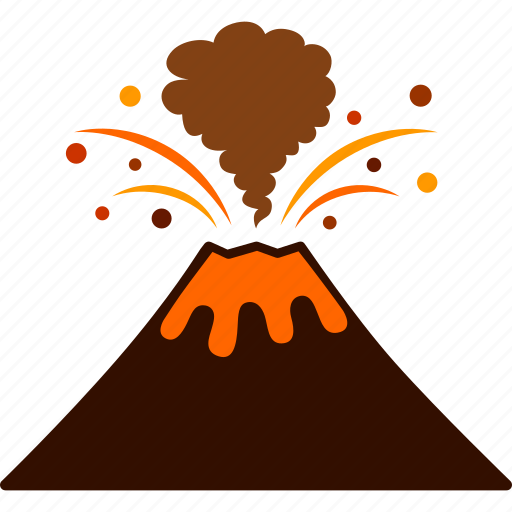
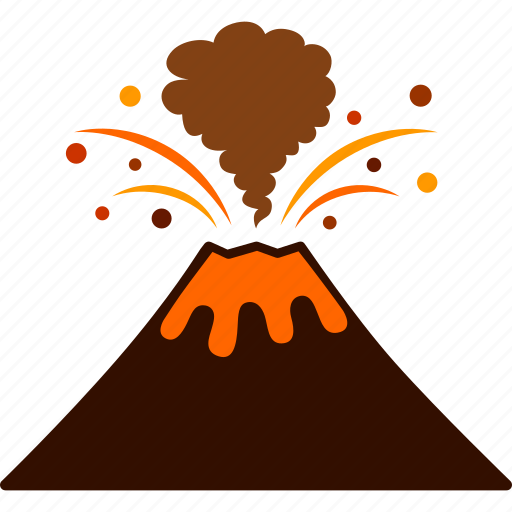
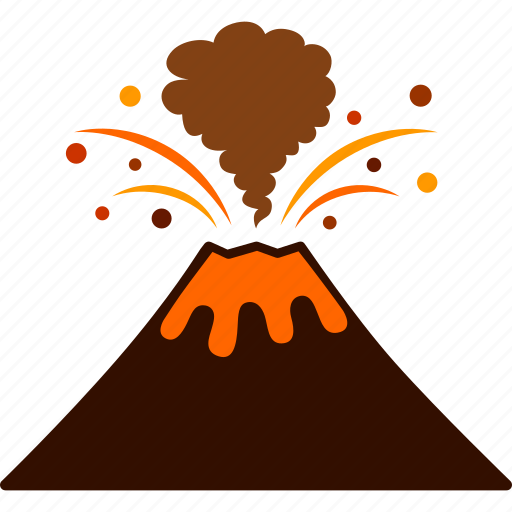
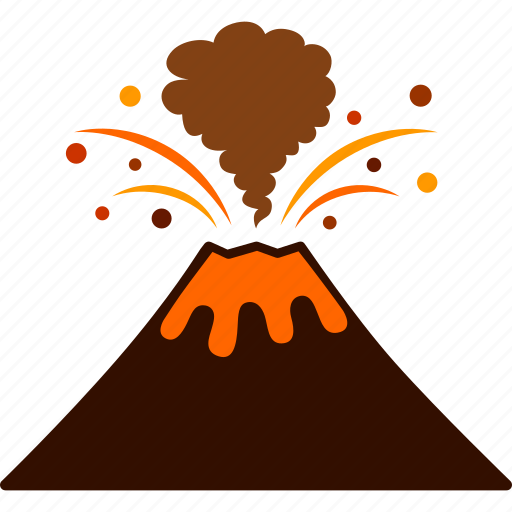
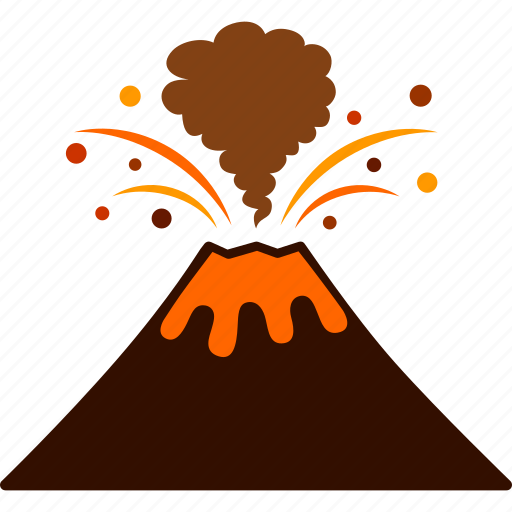
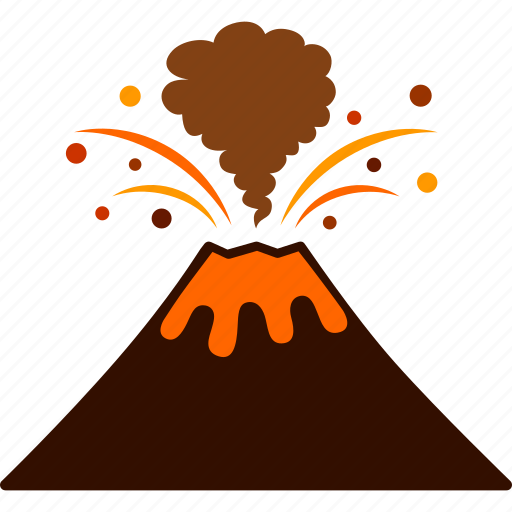
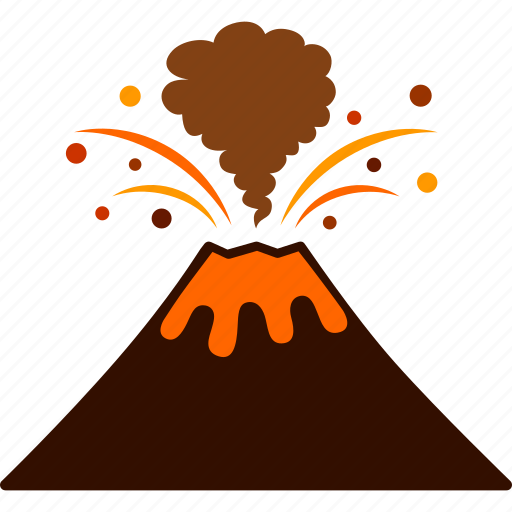
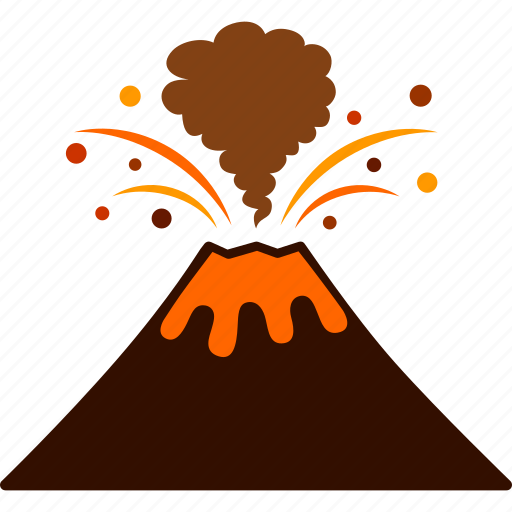
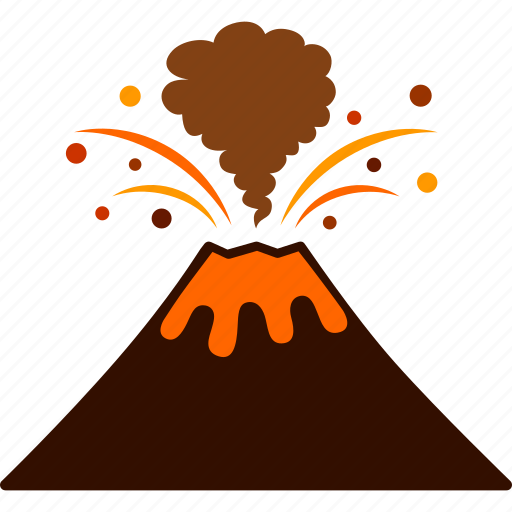
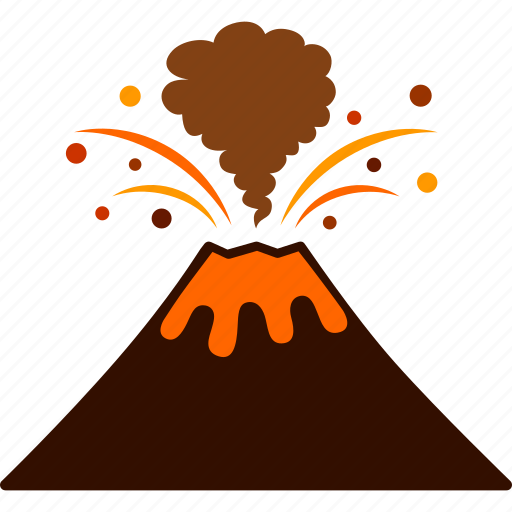
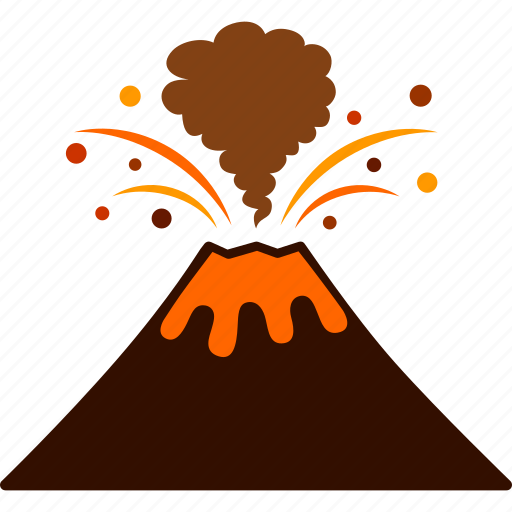
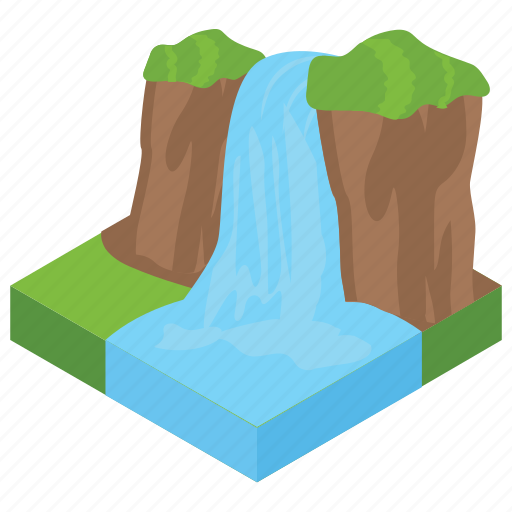
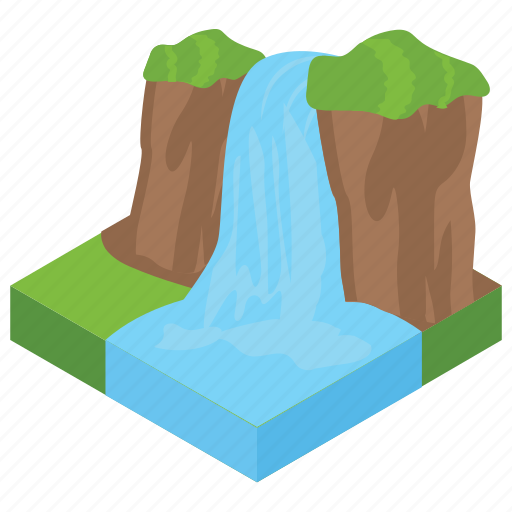
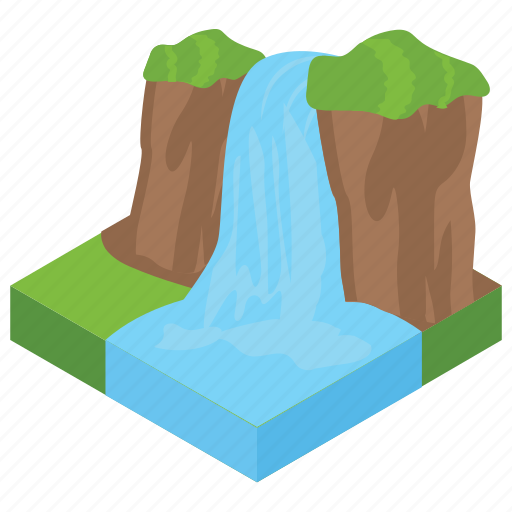
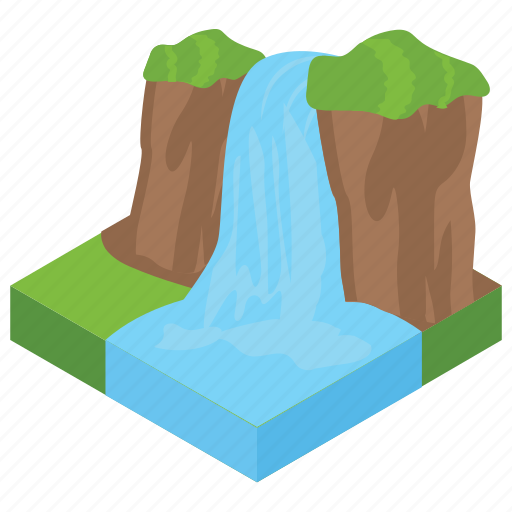
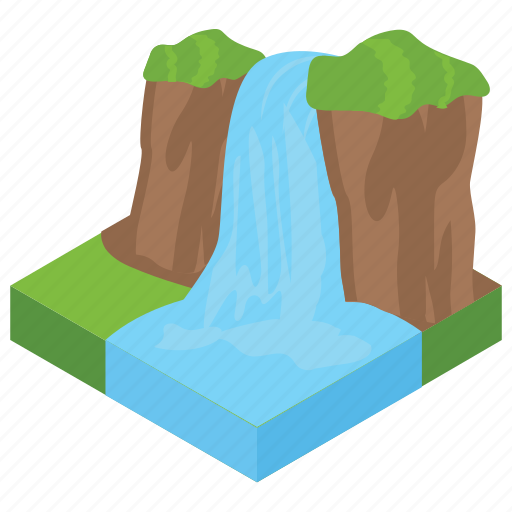
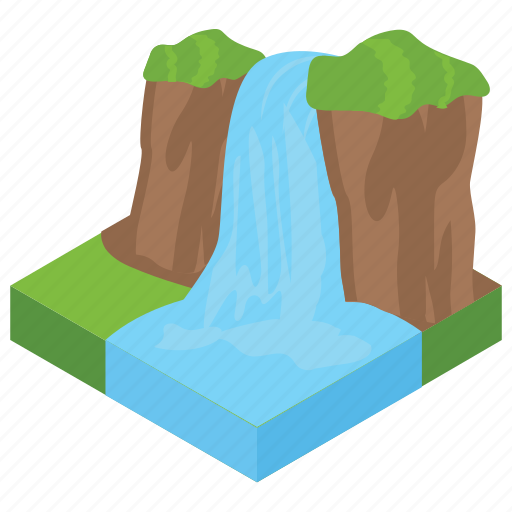

In [9]:
# Add index map:
mini_map = folium.plugins.MiniMap(toggle_display=True)
map.add_child(mini_map)

map